# Multilayer Perceptron(MLP)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
%matplotlib inline
%config InlineBackend.figure_format='retina'
print(f'pytorch version{torch.__version__}')
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'device: {device}')

pytorch version1.7.0+cu101
device: cpu


In [2]:
from torchvision import datasets,transforms

mnist_train=datasets.MNIST(root='./data/',train=True,transform=transforms.ToTensor(),download=True)
mnist_test=datasets.MNIST(root='./data/',train=False,transform=transforms.ToTensor(),download=True)
print(f'mnist_train {mnist_train}')
print(f'mnist_train {mnist_test}')
print('Done')

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...




Done!
mnist_train Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train
    StandardTransform
Transform: ToTensor()
mnist_train Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data/
    Split: Test
    StandardTransform
Transform: ToTensor()
Done


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [9]:
type(mnist_train)

torchvision.datasets.mnist.MNIST

# Data Iterator

In [3]:
BATCH_SIZE=256
train_iter=torch.utils.data.DataLoader(mnist_train,batch_size=BATCH_SIZE,shuffle=True,num_workers=1) # 다음 epoch로 넘어갈 때 shuffle True
test_iter=torch.utils.data.DataLoader(mnist_test,batch_size=BATCH_SIZE,shuffle=True,num_workers=1)
print('Done')

Done


In [4]:
class MultiLayerPerceptronClass(nn.Module):
    def __init__(self,name='mlp',xdim=784,hdim=256,ydim=10):
        super(MultiLayerPerceptronClass,self).__init__()
        self.name=name
        self.xdim=xdim
        self.hdim=hdim
        self.ydim=ydim
        self.lin_1=nn.Linear(self.xdim,self.hdim)
        self.lin_2=nn.Linear(self.hdim,self.ydim)
        self.init_param() # initialize parameters

    def init_param(self):
        nn.init.kaiming_normal_(self.lin_1.weight)
        nn.init.zeros_(self.lin_1.bias)
        nn.init.kaiming_normal_(self.lin_2.weight)
        nn.init.zeros_(self.lin_2.bias)

    def forward(self,x):
        net=x
        net=self.lin_1(net)
        net=F.relu(net)
        net=self.lin_2(net)
        return net

In [5]:
M=MultiLayerPerceptronClass(name='mlp',xdim=784,hdim=256,ydim=10).to(device)
loss=nn.CrossEntropyLoss()
optm=optim.Adam(M.parameters(),lr=1e-3)
print('Done')

Done


# Simple Forward Path of the MLP Model

In [7]:
x_numpy=np.random.rand(2,784)
x_torch=torch.from_numpy(x_numpy).float().to(device)
y_torch=M.forward(x_torch)
y_numpy=y_torch.detach().cpu().numpy()
print(f'x_numpy:{x_numpy}')
print(f'x_torch:{x_torch}')
print(f'y_torch:{y_torch}')
print(f'y_numpy:{y_numpy}')

x_numpy:[[0.42284629 0.99415432 0.45982786 ... 0.19443734 0.53662005 0.41567839]
 [0.8973074  0.99422765 0.10146261 ... 0.98123074 0.98502719 0.70473418]]
x_torch:tensor([[0.4228, 0.9942, 0.4598,  ..., 0.1944, 0.5366, 0.4157],
        [0.8973, 0.9942, 0.1015,  ..., 0.9812, 0.9850, 0.7047]])
y_torch:tensor([[-0.6657, -0.2290, -0.3875, -1.3248,  0.7465, -0.2861, -0.2710, -0.2052,
          0.5454,  0.6769],
        [-0.0782, -0.1339, -0.6272, -0.8164,  0.3294,  0.2133, -0.5802,  0.2440,
          0.3795,  0.9583]], grad_fn=<AddmmBackward>)
y_numpy:[[-0.6656802  -0.22897461 -0.38748437 -1.3248289   0.7465254  -0.28611675
  -0.27101308 -0.20516953  0.54544604  0.67689806]
 [-0.07824446 -0.13387457 -0.62721276 -0.8163878   0.3293568   0.21330462
  -0.58020973  0.24395038  0.37949255  0.9582596 ]]


# Check Parameters

In [10]:
np.set_printoptions(precision=3)
n_param=0
for p_idx,(param_name,param) in enumerate(M.named_parameters()):
    param_numpy=param.detach().cpu().numpy()
    n_param+=len(param_numpy.reshape(-1))
    print(f'{p_idx} name : {param_name} shape : {param_numpy.shape}')
    print(f'val {param_numpy.reshape(-1)[:5]}')
print(f'Total number of parameters: {n_param}')

0 name : lin_1.weight shape : (256, 784)
val [-0.056  0.004 -0.03  -0.032  0.047]
1 name : lin_1.bias shape : (256,)
val [0. 0. 0. 0. 0.]
2 name : lin_2.weight shape : (10, 256)
val [ 0.056 -0.129 -0.184 -0.15   0.073]
3 name : lin_2.bias shape : (10,)
val [0. 0. 0. 0. 0.]
Total number of parameters: 203530


# Evaluation Function

In [11]:
def func_eval(model,data_iter,device):
    with torch.no_grad():
        model.eval() #evaluate (affects Dropout and BN if exists)
        n_total,n_correct=0,0
        for batch_in,batch_out in data_iter:
            y_trgt=batch_out.to(device)
            model_pred=model(batch_in.view(-1,28*28).to(device))
            _,y_pred=torch.max(model_pred.data,1)
            n_correct+=(y_pred==y_trgt).sum().item()
            n_total+=batch_in.size(0)
        val_accr=(n_correct/n_total)
        model.train() #back to train mode
    return val_accr
print('Done')

Done


# Initial Evaluation

In [13]:
M.init_param()
train_accr=func_eval(M,train_iter,device)
test_accr=func_eval(M,test_iter,device)
print(f'train_accr:{train_accr}, test_accr:{test_accr}')

train_accr:0.07861666666666667, test_accr:0.0769


# Train

In [15]:
# random seed fix 가정해두고
print('start training')
M.init_param()
M.train()
EPOCHS,print_every=10,1
for epoch in range(EPOCHS): # EPOCH : train data 한번 훑는 것
    loss_val_sum=0
    for batch_in, batch_out in train_iter:
        # forward path
        y_pred=M.forward(batch_in.view(-1,28*28).to(device))
        loss_out=loss(y_pred,batch_out.to(device))
        # update
        optm.zero_grad() # reset grad
        loss_out.backward() # backpropagate : 각각의 "weight"에 대해서 loss가 쌓여있을 것
        optm.step() # optimizer update
        loss_val_sum+=loss_out
    loss_val_avg=loss_val_sum/len(train_iter)

    if ((epoch%print_every)==0) or (epoch==(EPOCHS-1)):
        train_accr=func_eval(M,train_iter,device)
        test_accr=func_eval(M,test_iter,device)
        print(f'epochs:{epoch}, loss:{loss_val_avg}, train_accr:{train_accr}, test_accr:{test_accr}')



start training
epochs:0, loss:0.372500479221344, train_accr:0.9463333333333334, test_accr:0.9437
epochs:1, loss:0.16550347208976746, train_accr:0.9628166666666667, test_accr:0.9594
epochs:2, loss:0.11707498878240585, train_accr:0.9733666666666667, test_accr:0.9669
epochs:3, loss:0.09001265466213226, train_accr:0.9799666666666667, test_accr:0.9724
epochs:4, loss:0.0726533904671669, train_accr:0.9843833333333334, test_accr:0.9745
epochs:5, loss:0.05880294740200043, train_accr:0.98715, test_accr:0.9766
epochs:6, loss:0.04867445304989815, train_accr:0.9905, test_accr:0.9769
epochs:7, loss:0.04053735360503197, train_accr:0.9902333333333333, test_accr:0.9759
epochs:8, loss:0.0334491990506649, train_accr:0.9936666666666667, test_accr:0.9787
epochs:9, loss:0.028156857937574387, train_accr:0.9951333333333333, test_accr:0.9786


# Test

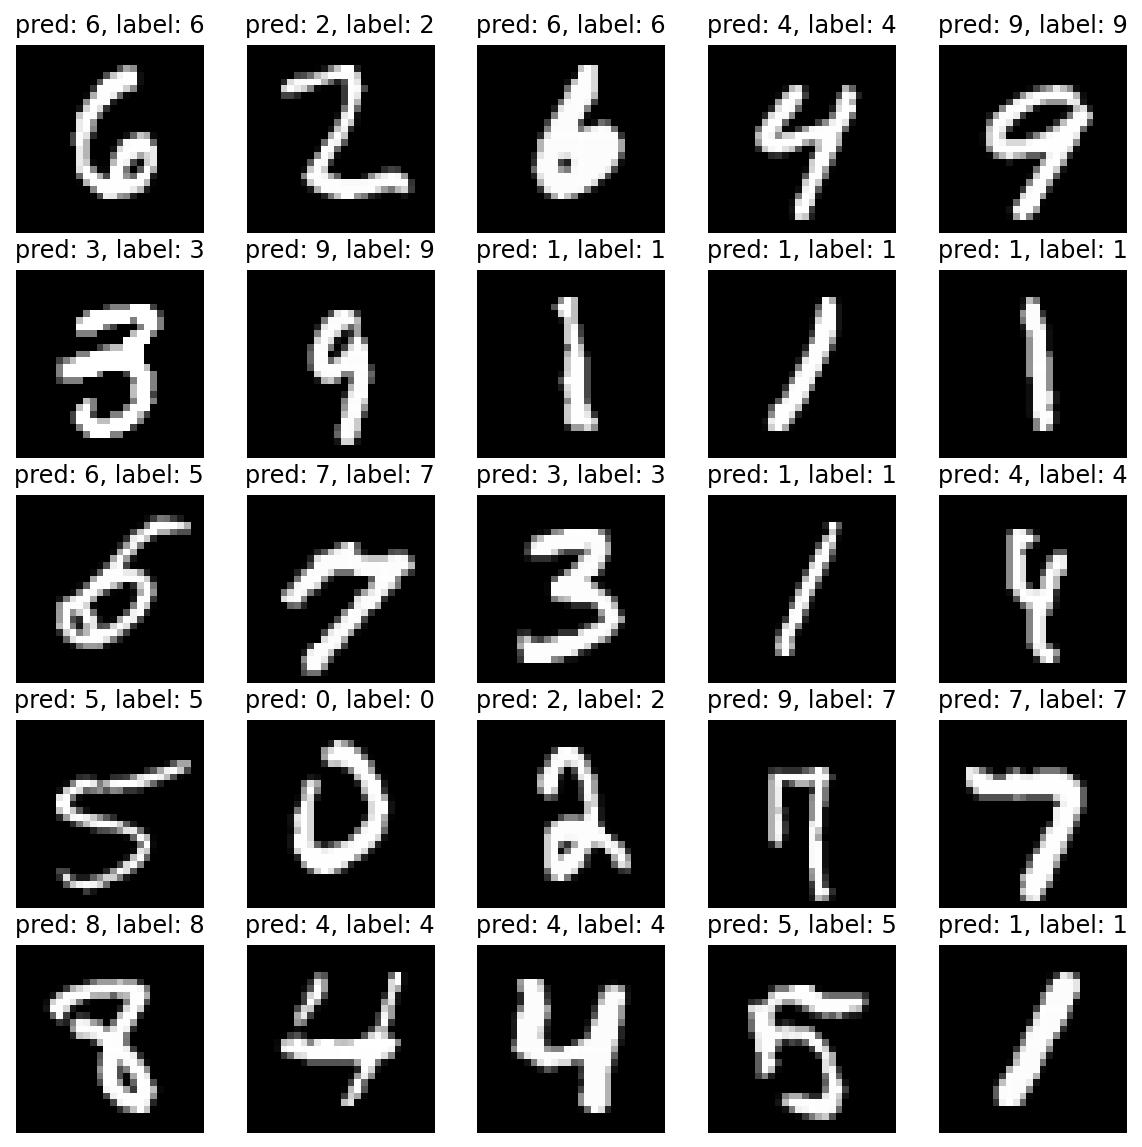

Done


In [19]:
n_sample=25
sample_indices=np.random.choice(len(mnist_test.targets),n_sample,replace=False)
test_x=mnist_test.data[sample_indices]
test_y=mnist_test.targets[sample_indices]
with torch.no_grad():
    y_pred=M.forward(test_x.view(-1,28*28).type(torch.float).to(device))
y_pred=y_pred.argmax(axis=1)
plt.figure(figsize=(10,10))
for idx in range(n_sample):
    plt.subplot(5,5,idx+1)
    plt.imshow(test_x[idx],cmap='gray')
    plt.axis('off')
    plt.title(f'pred: {y_pred[idx]}, label: {test_y[idx]}')
plt.show()
print('Done')